In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

/home/nakagawa/.local/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def calc_accuracy(df):
    return (df['true_label'] == df['predict_label']).sum() / len(df)

# Prediction Import

In [3]:
LABELS = ["Downstairs", "Jogging", "Sitting", "Standing", "Upstairs", "Walking"]
df = pd.read_csv('predict.csv', index_col=0)
predict = df.drop('true', axis=1)
true = df['true']
del df
true_encoded = true.map(lambda x: LABELS[x])
true_encoded.name = 'true_label'
predict.columns = LABELS
predict.head()

,Downstairs,Jogging,Sitting,Standing,Upstairs,Walking
0,-0.076044,0.354940,0.766970,-0.646194,0.188809,-0.003506
1,-0.064630,0.426821,0.716968,-0.673659,0.184019,-0.000704
2,-0.024560,0.322446,0.646498,-0.620332,0.165249,0.067869
3,0.008093,0.452317,0.756234,-0.602843,0.230290,0.153240
4,0.008317,0.412182,0.740650,-0.627341,0.215198,0.017947


In [4]:
# min-max normalization
predict = predict.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)
predict = predict.apply(lambda x: x / x.sum(), axis=1)

predict_label = predict.idxmax(axis=1)
predict_probability = predict.max(axis=1)
predict_probability.name = 'predict_probability'
predict_label.name = 'predict_label'
# predict.head()
# true.head()
# true_encoded.head()

In [5]:
df = pd.concat([
            predict,
            predict_probability,
            true,
            predict_label,
            true_encoded
        ], axis=1)
df.head(10)

,Downstairs,Jogging,Sitting,Standing,Upstairs,Walking,predict_probability,true,predict_label,true_label
0,0.127775,0.224362,0.316701,0.0,0.187131,0.144031,0.316701,5,Sitting,Walking
1,0.131518,0.237645,0.300302,0.0,0.185213,0.145322,0.300302,2,Sitting,Sitting
2,0.139226,0.220318,0.296046,0.0,0.183583,0.160826,0.296046,4,Sitting,Upstairs
3,0.132398,0.228667,0.294530,0.0,0.180551,0.163853,0.294530,1,Sitting,Jogging
4,0.140291,0.229425,0.301918,0.0,0.185950,0.142416,0.301918,3,Sitting,Standing
5,0.130620,0.227428,0.306694,0.0,0.196948,0.138310,0.306694,5,Sitting,Walking
6,0.149863,0.220152,0.303445,0.0,0.173106,0.153434,0.303445,0,Sitting,Downstairs
7,0.136004,0.228181,0.303234,0.0,0.182007,0.150573,0.303234,0,Sitting,Downstairs
8,0.129821,0.201350,0.298664,0.0,0.203788,0.166377,0.298664,1,Sitting,Jogging
9,0.134410,0.227059,0.296165,0.0,0.182782,0.159584,0.296165,5,Sitting,Walking


Accuracy:  0.05596697826878718


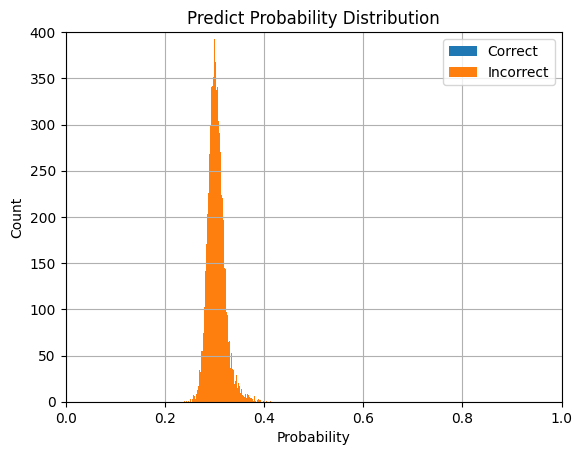

In [6]:
print('Accuracy: ', calc_accuracy(df))
# statival analysis
df.loc[df.true_label==df.predict_label, 'predict_probability'].hist(bins=100)
df.loc[df.true_label!=df.predict_label, 'predict_probability'].hist(bins=100)
plt.title('Predict Probability Distribution')
plt.xlim(0, 1)
plt.ylim(0, 400)
plt.xlabel('Probability')
plt.ylabel('Count')
plt.legend(['Correct', 'Incorrect'])

In [7]:
df['predict_probability'].agg(['mean', 'std', 'min', 'max', 'median'])

mean      0.304091
std       0.017268
min       0.239454
max       0.413458
median    0.302514
Name: predict_probability, dtype: float64